<a href="https://colab.research.google.com/github/tbg289/Portfolio-Projects/blob/main/moviebudget.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
data = pd.read_csv('cost_revenue_dirty.csv')
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import plotly.express as px


In [ ]:
data = pd.read_csv('cost_revenue_dirty.csv')
data.Release_Date = pd.to_datetime(data.Release_Date)
data.dtypes

Rank                              int64
Release_Date             datetime64[ns]
Movie_Title                      object
USD_Production_Budget            object
USD_Worldwide_Gross              object
USD_Domestic_Gross               object
dtype: object

In [ ]:
chars_to_remove = [',', '$']
columns_to_clean = ['USD_Production_Budget', 
                    'USD_Worldwide_Gross',
                    'USD_Domestic_Gross']

for col in columns_to_clean:
    for char in chars_to_remove:
        # Replace each character with an empty string
        data[col] = data[col].astype(str).str.replace(char, "")
    # Convert column to a numeric data type
    data[col] = pd.to_numeric(data[col])

<ipython-input-26-1ab4db31a293>:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data[col] = data[col].astype(str).str.replace(char, "")


In [ ]:
data.dtypes

Rank                              int64
Release_Date             datetime64[ns]
Movie_Title                      object
USD_Production_Budget             int64
USD_Worldwide_Gross               int64
USD_Domestic_Gross                int64
dtype: object

In [ ]:
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000


<Axes: xlabel='USD_Production_Budget', ylabel='USD_Worldwide_Gross'>

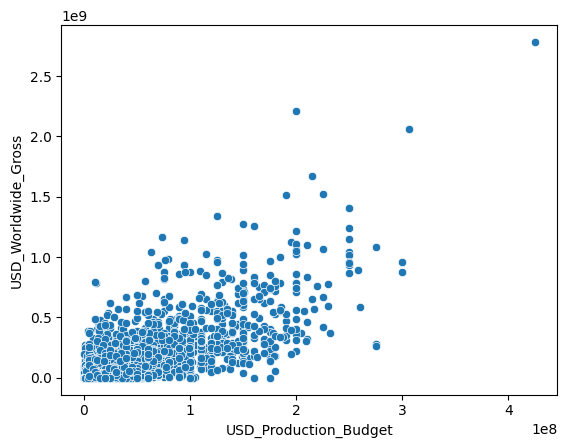

In [ ]:
sns.scatterplot(x="USD_Production_Budget",
                    y="USD_Worldwide_Gross",
                    data=data)

In [ ]:
# Explanatory Variable(s) or Feature(s)
X = pd.DataFrame(data, columns=['USD_Production_Budget'])
 
# Response Variable or Target
y = pd.DataFrame(data, columns=['USD_Worldwide_Gross']) 

In [ ]:
regressor = LinearRegression()

In [ ]:
regressor.fit(X, y)

LinearRegression()

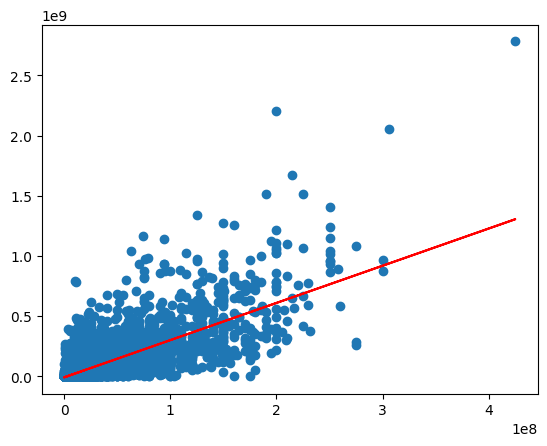

In [ ]:

Y_pred = regressor.predict(X)
plt.scatter(X, y)
plt.plot(X, Y_pred, color='red')
plt.show()